## 1. Logistic-classifier

In [1]:
# Import library
from hdf5_dataset import HDF5Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import h5py
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load data
train_path = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Homeworks/HW6/mnist_traindata.hdf5'
test_path = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Homeworks/HW6/mnist_testdata.hdf5'

train_set = HDF5Dataset(
      file_path = f"{train_path}", data_name = 'xdata', label_name = 'ydata')

test_set = HDF5Dataset(
      file_path = f"{test_path}", data_name = 'xdata', label_name = 'ydata')

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False)

num_pixels = 28*28
num_class = 10

# Define logistic regression model
class LRModel(nn.Module):
  def __init__(self):
    super(LRModel, self).__init__()
    self.linear = nn.Linear(num_pixels, num_class)

  def forward(self, x):
    x = x.view(-1, num_pixels)
    out = self.linear(x)
    return out

# function to calculate accuracy

def cal_accuracy(loader, model):
  with torch.no_grad():
    total = 0
    correct = 0
    tloss = 0.0

    model.eval()
    
    for xdata, ydata in loader:
      
      xdata = xdata.to(device)

      test = xdata.view(-1, num_pixels)
      outputs = model(xdata).cpu()
      loss = criterion(outputs, ydata)

      tloss += loss.item()

      predicted = torch.max(outputs,1)[1]
      total += len(ydata)
      correct += (predicted == np.argmax(ydata, axis=1)).sum().numpy()
  return 100 * correct / total, tloss

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# Training

# Initialize the model
model = LRModel()
# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer with L2 regularization
# From the experiment, learning rate = 0.01 showed the best result
optimizer = optim.SGD(model.parameters(), lr = 0.01, weight_decay = 0.0001)

num_epochs = 40
train_loss, test_loss = [], []
train_acc, test_acc = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (xdata,ydata) in enumerate(train_loader):
        # Forward
        outputs = model(xdata)
        loss = criterion(outputs, ydata)
        
        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        predicted = torch.max(outputs,1)[1]
        total += len(ydata)
        correct += (predicted == np.argmax(ydata, axis=1)).sum().numpy()

    # Train loss
    train_loss = np.append(train_loss, running_loss / len(train_loader))

    # Train accuracy
    train_acc = np.append(train_acc, 100 * correct / total)

    # Test loss and accuracy
    tmp_acc, tmp_loss = cal_accuracy(test_loader, model)
    test_acc = np.append(test_acc, tmp_acc)
    test_loss = np.append(test_loss, tmp_loss/len(test_loader))


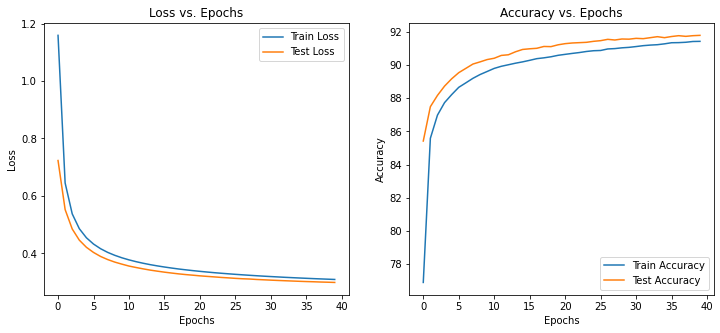

In [4]:
# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


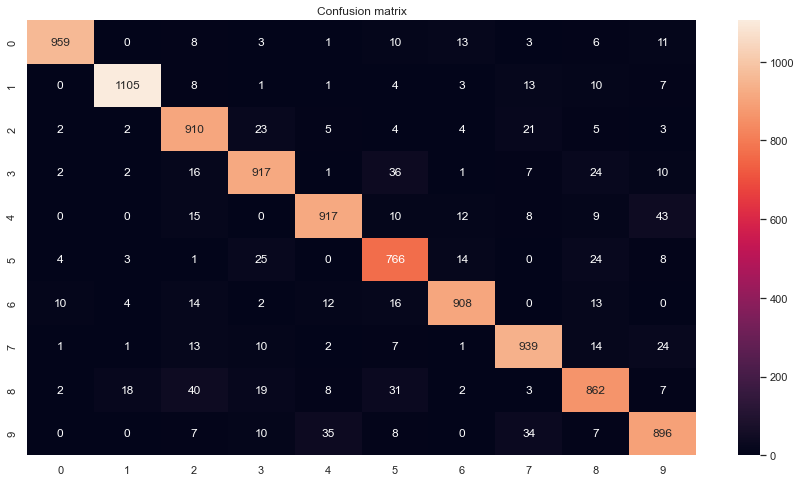

In [5]:
# Confusion matrix
predict_test = model(test_set[:][0]).argmax(1).tolist()
true_test = test_set[:][1].argmax(1).tolist()

cf_matrix = confusion_matrix(predict_test, true_test)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cf_matrix, annot = True, fmt = 'g')
plt.title('Confusion matrix')
plt.show()

## 2. Fashion MNIST

In [2]:
# Data download

data_root_folder = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Homeworks/HW6/'

train_set = torchvision.datasets.FashionMNIST(root = f"{data_root_folder}", train = True, download = True, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

# hyperparameters
num_pixels = 28*28
num_class = 10

In [ ]:
data = ohbmModel.Data_train_pca_boots
        labels = ohbmModel.train_labels_model

        d = data.shape

        data = data.transpose(2,0,1).reshape(d[2], 1, d[0], d[1])
        data2 = torch.tensor(data, dtype=torch.float32)
        labels2 = torch.tensor(labels, dtype=torch.long)

        train_dataset = EEGDataset(data2, labels2)
        train_loader = DataLoader(train_dataset, batch_size = 100, shuffle = True)

In [7]:
# Define the network
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(num_pixels, 128)
        self.relu = nn.ReLU()
        self.output = nn.Linear(128, num_class)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        
        x = self.output(x)
        return x

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(num_pixels, 48)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.output = nn.Linear(48, num_class)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output(x)
        return x


In [8]:
# Training the first model

# Initialize the model
model = Net1()

# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer with no regularization
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 40
train_loss, test_loss = [], []
train_acc, test_acc = [], []

for epoch in range(num_epochs):
    model.train()

    for i, (xdata,ydata) in enumerate(train_loader):
        # Forward
        outputs = model(xdata)
        loss = criterion(outputs, ydata)
        
        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

input_layer_weights1 = model.hidden.weight.detach().cpu().numpy()
output_layer_weights1 = model.output.weight.detach().cpu().numpy()

In [9]:
# Training the second model

# Initialize the model
model = Net2()

# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer with L2 regularization
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay = 0.0001)

num_epochs = 1
train_loss, test_loss = [], []
train_acc, test_acc = [], []

for epoch in range(num_epochs):
    model.train()

    for i, (xdata,ydata) in enumerate(train_loader):
        # Forward
        outputs = model(xdata)
        loss = criterion(outputs, ydata)
        
        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

input_layer_weights2 = model.hidden.weight.detach().cpu().numpy()
output_layer_weights2 = model.output.weight.detach().cpu().numpy()

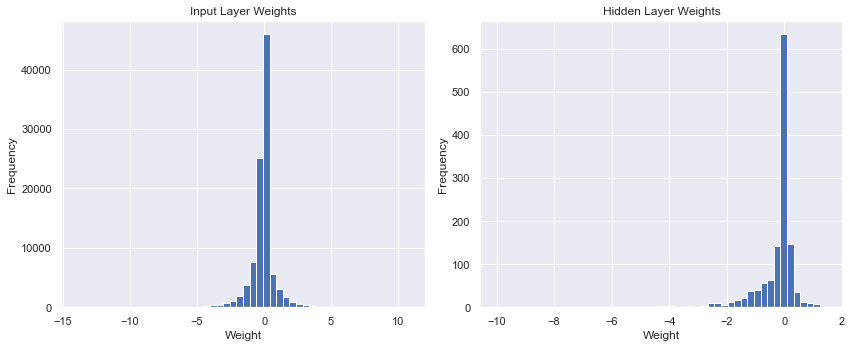

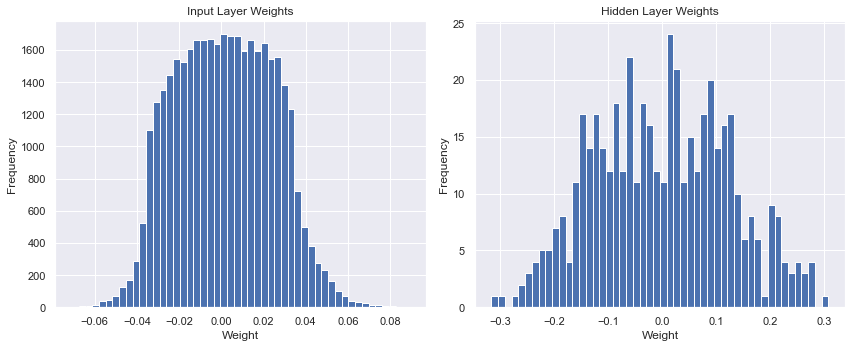

In [10]:
# Plot the histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(input_layer_weights1.flatten(), bins=50)
plt.title('Input Layer Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(output_layer_weights1.flatten(), bins=50)
plt.title('Hidden Layer Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(input_layer_weights2.flatten(), bins=50)
plt.title('Input Layer Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(output_layer_weights2.flatten(), bins=50)
plt.title('Hidden Layer Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We see that in the model where we used regularization, the weights tend in general to have lower magnitude. This is because we are imposing the regularization term which inhibits the magnitude of the weights to increase freely.

## 3. MLP

In [11]:
# Data download

data_root_folder = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Homeworks/HW6/'

train_set = torchvision.datasets.CIFAR10(root = f"{data_root_folder}", train = True, download = True, transform = transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root = f"{data_root_folder}", train = False, download = True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [12]:
# hyperparameters

num_pixels = 3*32*32
num_class = 10

# Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden1 = nn.Linear(num_pixels, 256)
        self.relu = nn.ReLU()
        self.hidden2 = nn.Linear(256, 128)
        self.output = nn.Linear(128, num_class)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.hidden2(x)
        x = self.relu(x)        
        x = self.dropout(x)
        x = self.output(x)
        return x

# accuracy
def cal_accuracy(loader, model):
  with torch.no_grad():
    model.eval()

    total = 0
    correct = 0
    tloss = 0.0
    
    for xdata, ydata in loader:
      xdata = xdata.to(device)

      test = xdata.view(-1, num_pixels)
      outputs = model(xdata).cpu()
      loss = criterion(outputs, ydata)

      tloss += loss.item()
      predicted = torch.max(outputs,1)[1]
      total += len(ydata)
      correct += (predicted == ydata).sum().numpy()
  return 100 * correct / total, tloss

In [22]:
# Training the second model

# Initialize the model
model = Net()

# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer with L2 regularization
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay = 0.0001)

num_epochs = 50
train_loss, test_loss = [], []
train_acc, test_acc = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (xdata,ydata) in enumerate(train_loader):
        # Forward
        outputs = model(xdata)
        loss = criterion(outputs, ydata)
        
        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = torch.max(outputs,1)[1]
        total += len(ydata)
        correct += (predicted == ydata).sum().numpy()

    # Train loss
    train_loss = np.append(train_loss, running_loss / len(train_loader))

    # Train accuracy
    train_acc = np.append(train_acc, 100 * correct / total)

    # Test loss and accuracy
    tmp_acc, tmp_loss = cal_accuracy(test_loader, model)
    test_acc = np.append(test_acc, tmp_acc)
    test_loss = np.append(test_loss, tmp_loss/len(test_loader))

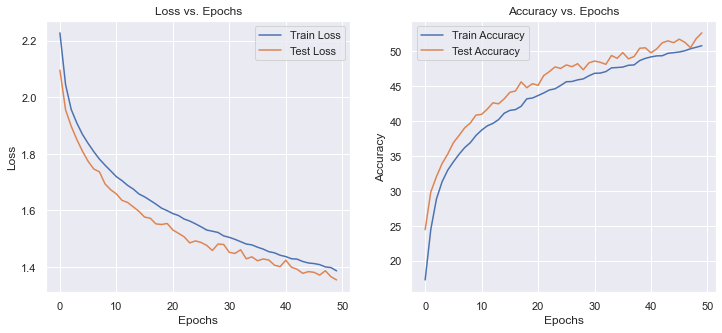

In [23]:
# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

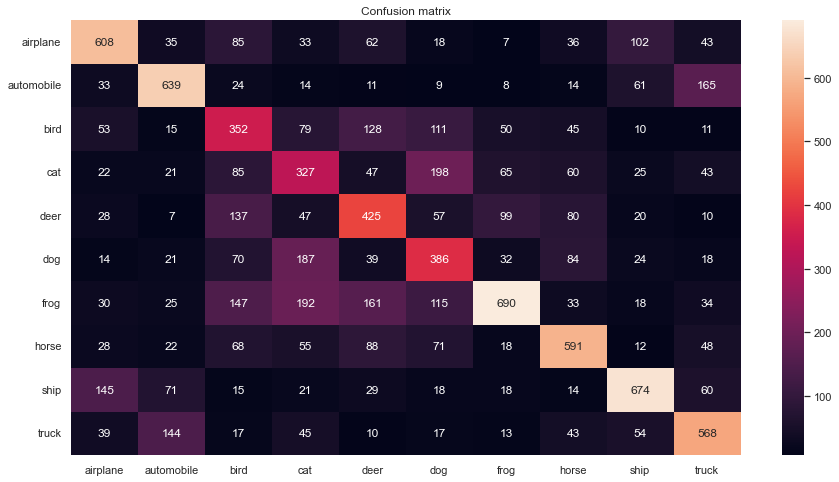

In [24]:
# Confusion matrix
labels_map =  train_set.classes

predict_test = []
true_test = []

with torch.no_grad():
    for xdata, ydata in test_loader:
        outputs = model(xdata)
        predicted = torch.max(outputs,1)[1]
        predict_test.extend(predicted.numpy())
        true_test.extend(ydata.numpy())
        
f_matrix = confusion_matrix(predict_test, true_test)
df = pd.DataFrame(f_matrix, index = labels_map, columns = labels_map)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df, annot = True, fmt = 'g')
plt.title('Confusion matrix')
plt.show()

a) From the confusion matrix we can see the following:
1. Airplane is most likely confused for ship.
2. Automobile is most likely confused for truck.
3. Bird is most likely confused for deer and frog.
4. Cat is most likely confused for dog and frog.
5. Deer is most likely confused for frog and bird.
6. Dog is most likely confused for cat.
7. Frog is most likely confused for deer.
8. Horse is most likely confused for dog.
9. Ship is most likely confused for airplane.
10. Truck is most likely confused for automobile.

b) Two classes that are most likely to be confused overall are cat and dog.